# Algorytm k-średnich

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random as rd

In [26]:
dane=pd.read_excel('macierz_do_k_srednich.xlsx',index_col=0)

In [27]:
dane

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
A1,0.785477,-0.989986,-0.223923,0.324105,1.177737,0.572501,-0.879768,-0.803582,-0.185602,1.363375
A2,1.266448,-0.098023,1.624142,1.430263,0.914256,0.639055,-0.605770,-0.645905,-0.403576,-1.637512
A3,0.478377,-0.855821,0.174791,0.716918,-0.728497,1.473244,-0.647178,-0.397160,-0.073274,0.419931
A4,0.658394,-0.287575,0.589827,0.835095,-0.578527,1.237128,-0.520326,-0.395458,0.154745,0.786589
A5,1.031126,0.307710,1.882856,1.332273,0.173580,0.559951,-0.632080,-0.643442,-0.271930,-1.182297
B1,-2.354765,0.856197,-1.088757,-1.861905,0.506108,-0.557470,0.930156,0.348334,-0.366663,0.911362
B2,-2.910756,0.913286,-1.570808,-2.031878,-0.684745,-0.068030,1.131423,0.747508,-0.061130,0.409629
B3,-2.430550,0.562682,-1.112830,-2.114065,-0.145231,-0.314360,1.009422,0.266102,-0.154936,0.921964
B4,-1.541822,1.825125,0.740589,-1.597794,1.231191,-0.942646,0.802076,0.017690,-0.806663,-0.504067
B5,-1.826913,1.539126,-0.479090,-1.805566,0.130560,-0.870972,0.747811,-0.102075,-0.343379,0.821580


In [28]:
lista=['PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']

In [29]:
dane=dane.drop(lista,axis=1)

In [30]:
min1=min(dane['PC1'])
max1=max(dane['PC1'])
min2=min(dane['PC2'])
max2=max(dane['PC2'])

In [31]:
lista_punktow_PC1=[]
for i in range(0,3):
    x=rd.uniform(min1,max1)
    lista_punktow_PC1.append(x)

In [32]:
lista_punktow_PC1

[-0.30251222006099665, -0.58638943670866, -1.4402255312737546]

In [33]:
lista_punktow_PC2=[]
for i in range(0,3):
    x=rd.uniform(min2,max2)
    lista_punktow_PC2.append(x)

In [34]:
lista_punktow_PC2

[-1.4702371818887348, -0.7158999626837006, 0.5068848080170942]

In [35]:
wspolrzedne={lista_punktow_PC1[0]:lista_punktow_PC2[0],
             lista_punktow_PC1[1]:lista_punktow_PC2[1],
             lista_punktow_PC1[2]:lista_punktow_PC2[2]}

In [36]:
result = wspolrzedne.items()
data = list(result)
wspolrzedne_array = np.array(data)
print(wspolrzedne_array)

[[-0.30251222 -1.47023718]
 [-0.58638944 -0.71589996]
 [-1.44022553  0.50688481]]


In [37]:
p1=[]
p2=[]
p3=[]

In [38]:
for i in range(0,30):
    point1=np.array((dane['PC1'][i],dane['PC2'][i]))
    point2=wspolrzedne_array[0]
    distance=np.linalg.norm(point1 - point2)
    p1.append(distance)
for i in range(0,30):
    point1=np.array((dane['PC1'][i],dane['PC2'][i]))
    point2=wspolrzedne_array[1]
    distance=np.linalg.norm(point1 - point2)
    p2.append(distance)
for i in range(0,30):
    point1=np.array((dane['PC1'][i],dane['PC2'][i]))
    point2=wspolrzedne_array[2]
    distance=np.linalg.norm(point1 - point2)
    p3.append(distance)

In [39]:
p1 = np.array(p1)
p2 = np.array(p2)
p3 = np.array(p3)

p1 = p1.reshape(30,1)
p2 = p2.reshape(30,1)
p3 = p3.reshape(30,1)

In [40]:
joined = np.concatenate((p1,p2,p3), axis = 1)

In [41]:
joined

array([[1.18926943, 1.39897836, 2.68223289],
       [2.08437228, 1.95314583, 2.77344472],
       [0.99362702, 1.07392047, 2.35329617],
       [1.52382055, 1.31641449, 2.24396303],
       [2.22254056, 1.91419252, 2.47936452],
       [3.102263  , 2.36614443, 0.97897939],
       [3.53328654, 2.83847198, 1.52565398],
       [2.94300932, 2.24403628, 0.99189477],
       [3.52069593, 2.71471152, 1.32214931],
       [3.37343522, 2.57372128, 1.10229281],
       [1.34804345, 1.49856734, 2.71867687],
       [1.39997818, 1.18803107, 2.16590354],
       [0.75045668, 1.03424788, 2.4322716 ],
       [0.8558109 , 1.5842865 , 3.07396951],
       [1.28112037, 1.76497657, 3.16424568],
       [2.34452719, 2.12856919, 2.78380641],
       [1.38643574, 1.73020376, 3.05073247],
       [1.65420212, 1.98000631, 3.25986125],
       [1.83302966, 2.2045308 , 3.49743401],
       [2.80838601, 2.62671296, 3.23227347],
       [3.12961383, 2.33583916, 0.84911337],
       [4.02377156, 3.25695693, 1.77912654],
       [3.

In [42]:
klas=np.argmin(joined,axis=1)
klas

array([0, 1, 0, 1, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2,
       2, 2, 2, 1, 1, 0, 0, 1])

In [43]:
k=3

In [44]:
c1=wspolrzedne_array[0]
c2=wspolrzedne_array[1]
c3=wspolrzedne_array[2]

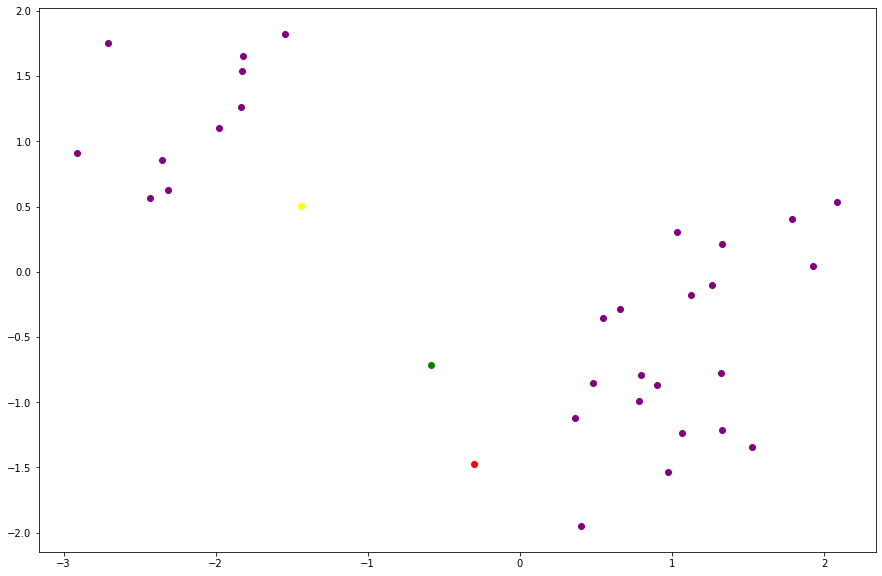

In [45]:
plt.scatter(dane['PC1'],dane['PC2'],color='purple')
plt.scatter(c1[0],c1[1],color='red')
plt.scatter(c2[0],c2[1],color='green')
plt.scatter(c3[0],c3[1],color='yellow')
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

In [46]:
nowy_centroid=np.array([dane[klas==i].mean(axis=0)for i in range(k)])
nowy_centroid

array([[ 0.90542393, -1.15279976],
       [ 1.3066944 ,  0.06532241],
       [-2.17199128,  1.20928957]])

In [47]:
centroids=nowy_centroid

In [48]:
c1=nowy_centroid[0]
c2=nowy_centroid[1]
c3=nowy_centroid[2]

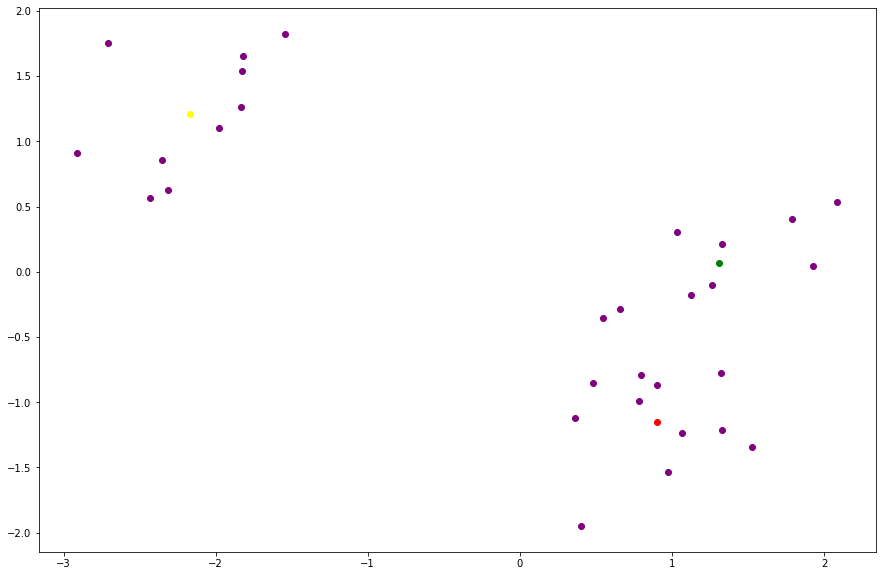

In [50]:
plt.scatter(dane['PC1'],dane['PC2'],color='purple')
plt.scatter(c1[0],c1[1],color='red')
plt.scatter(c2[0],c2[1],color='green')
plt.scatter(c3[0],c3[1],color='yellow')
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

In [51]:
iteracje=0

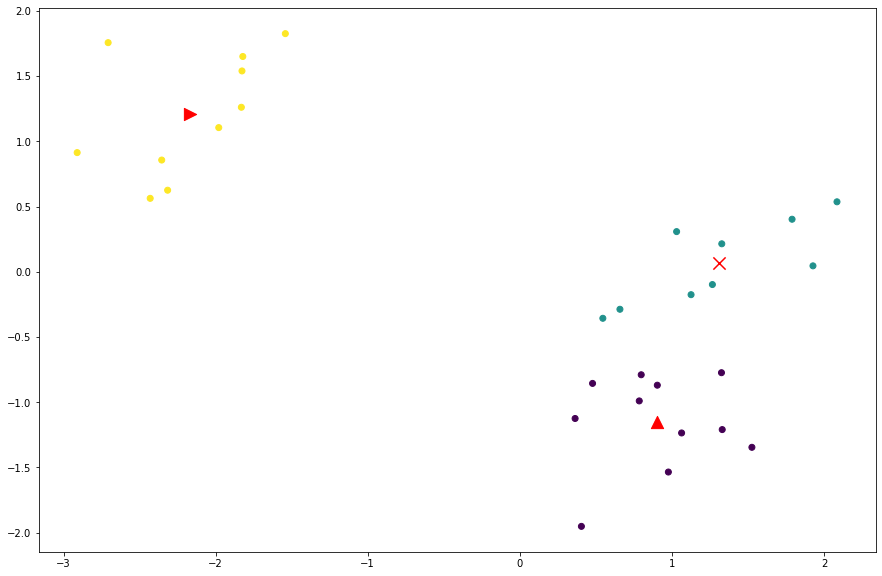

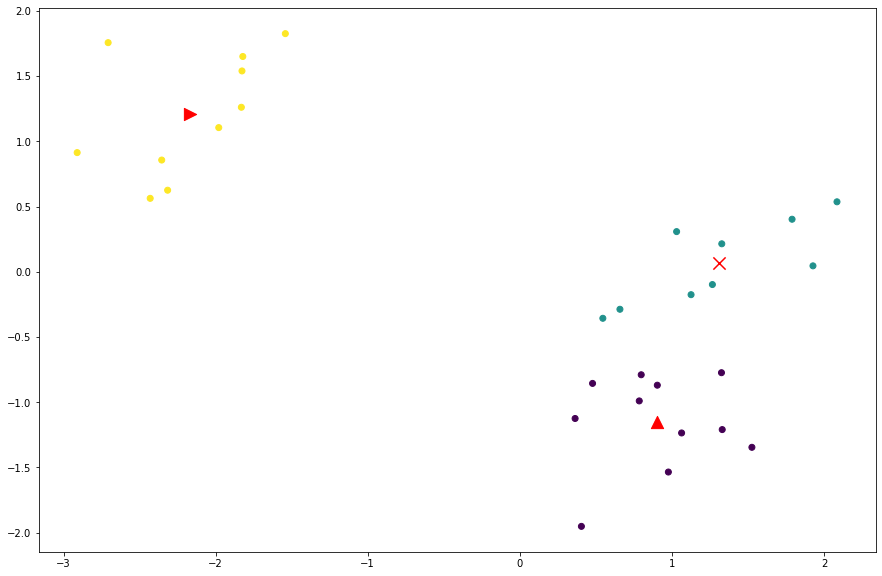

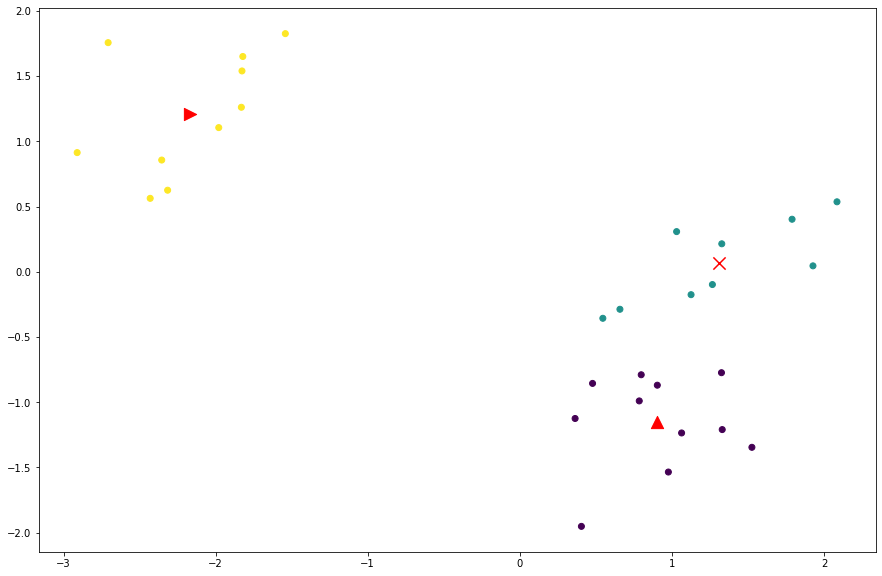

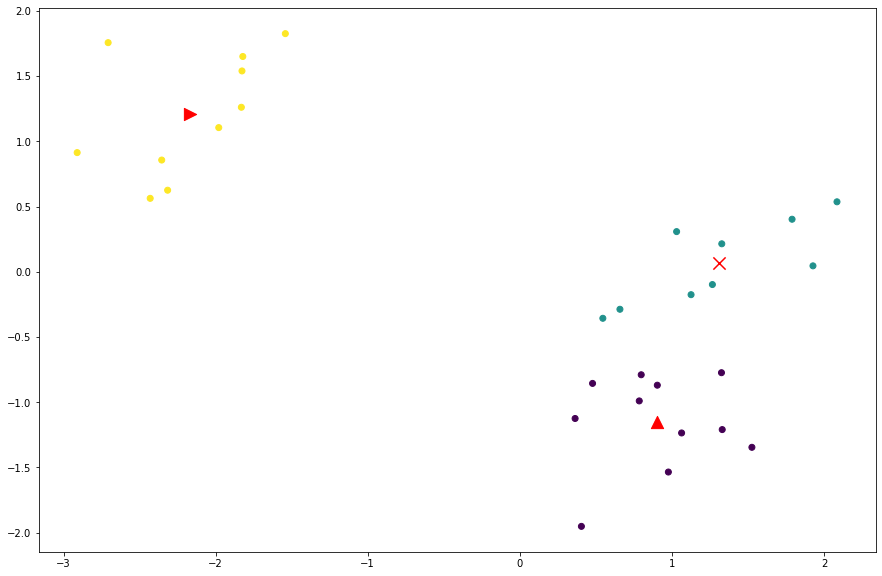

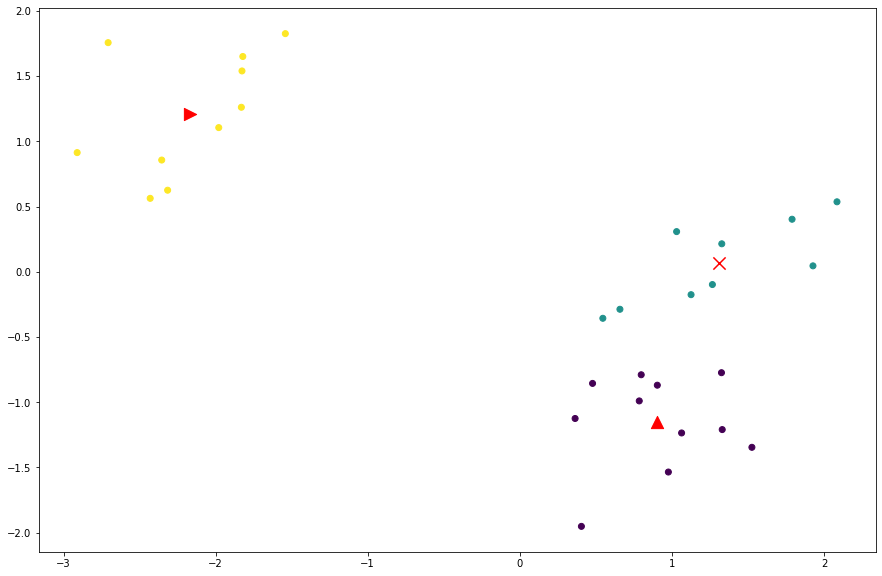

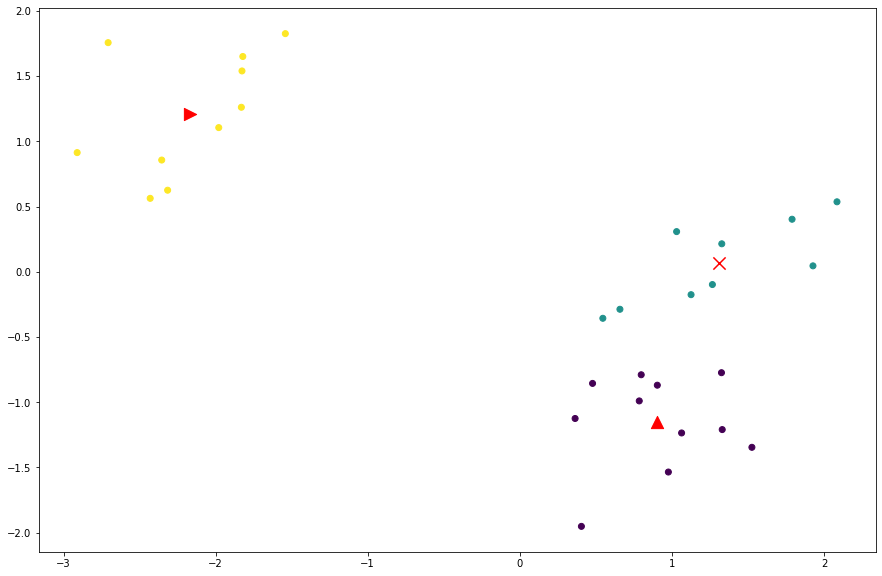

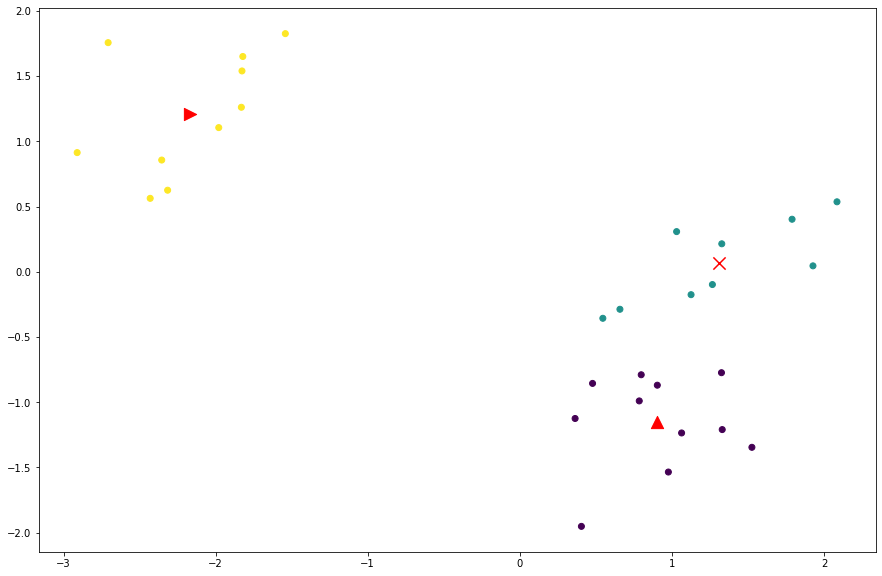

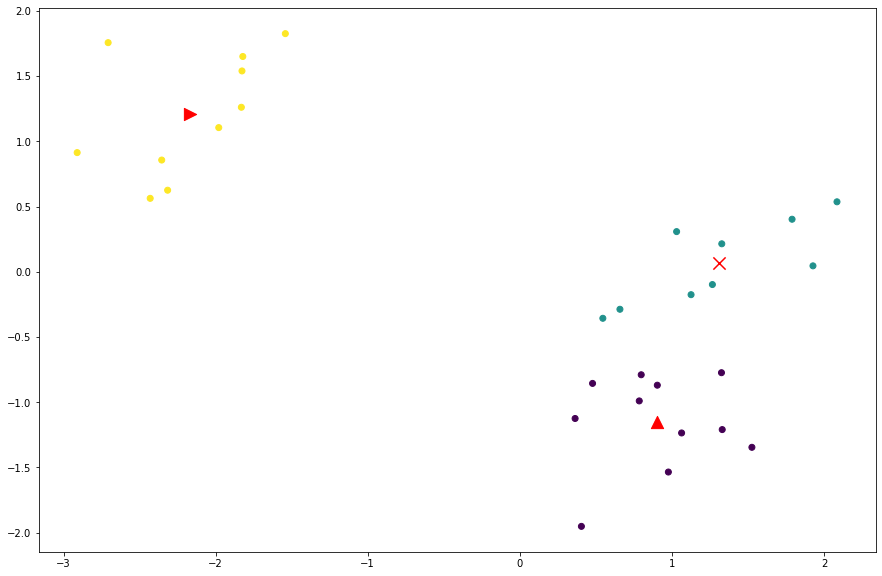

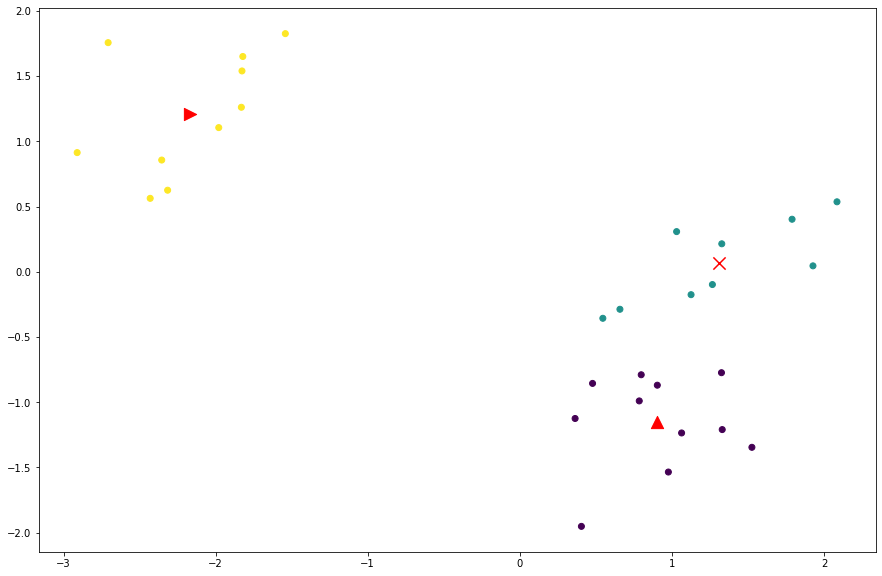

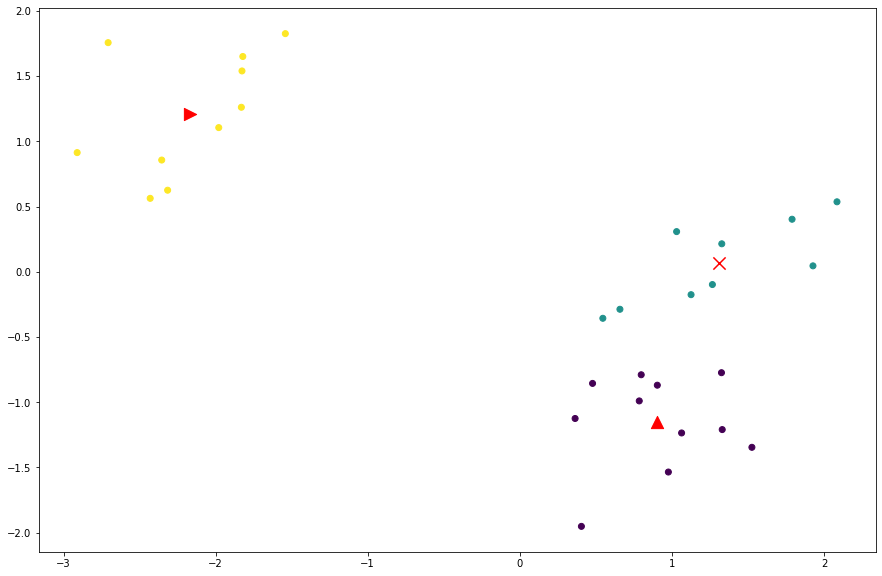

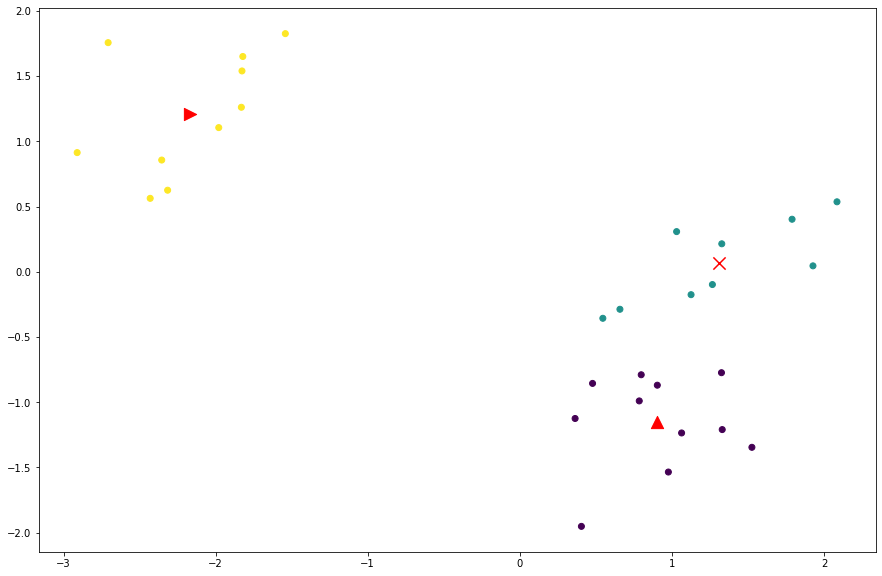

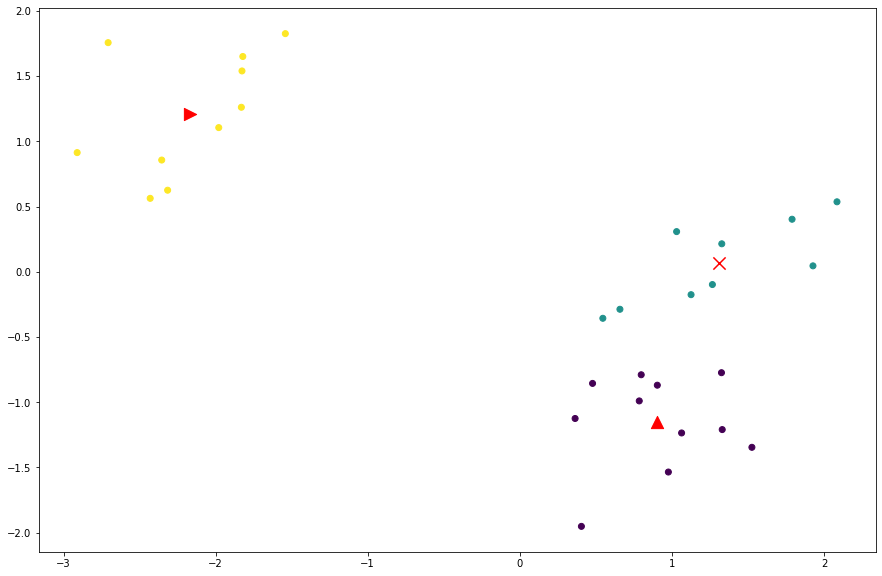

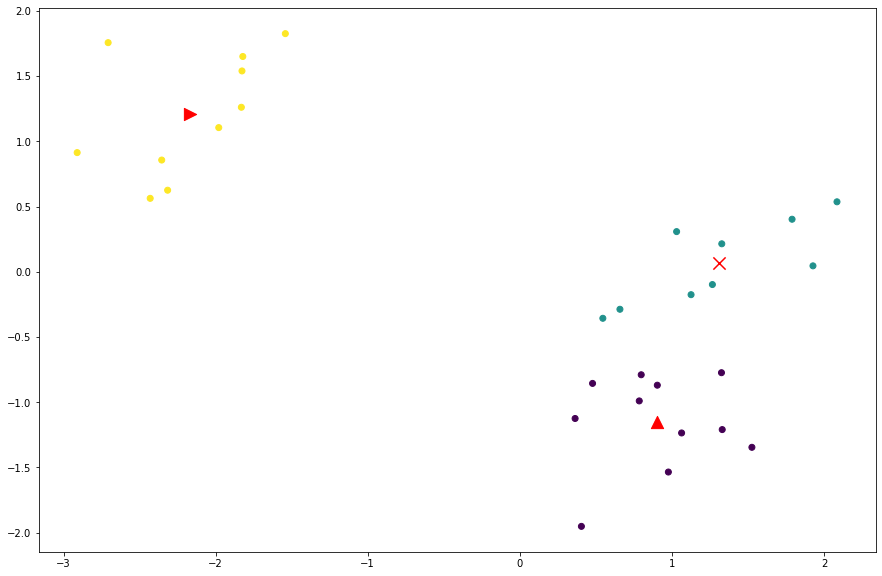

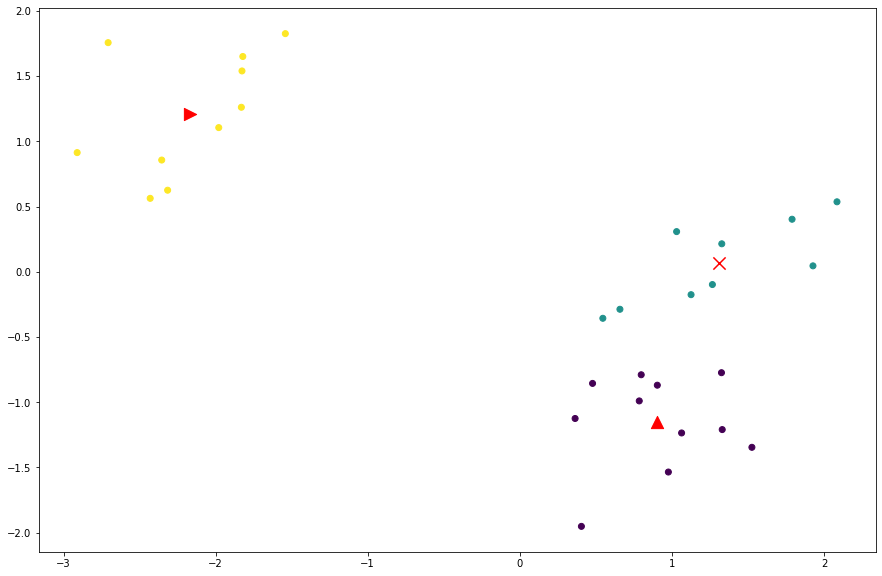

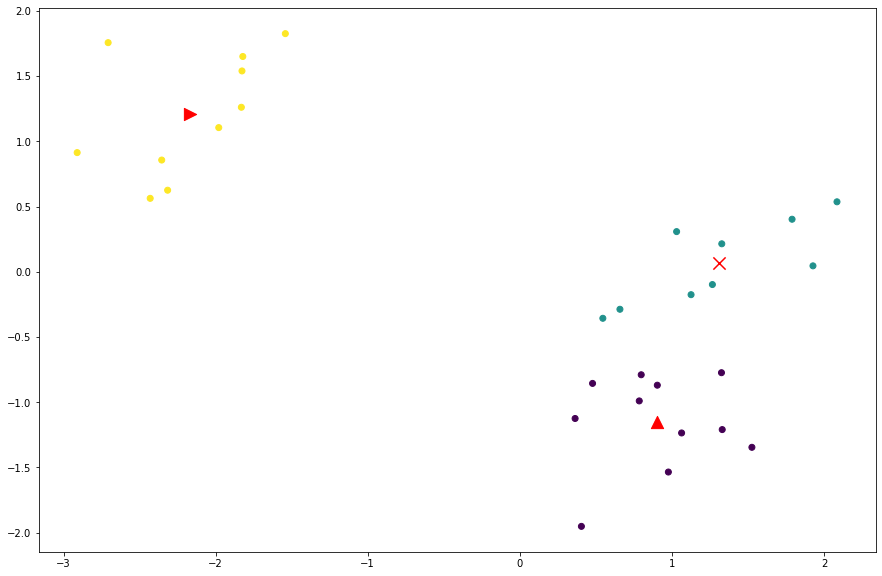

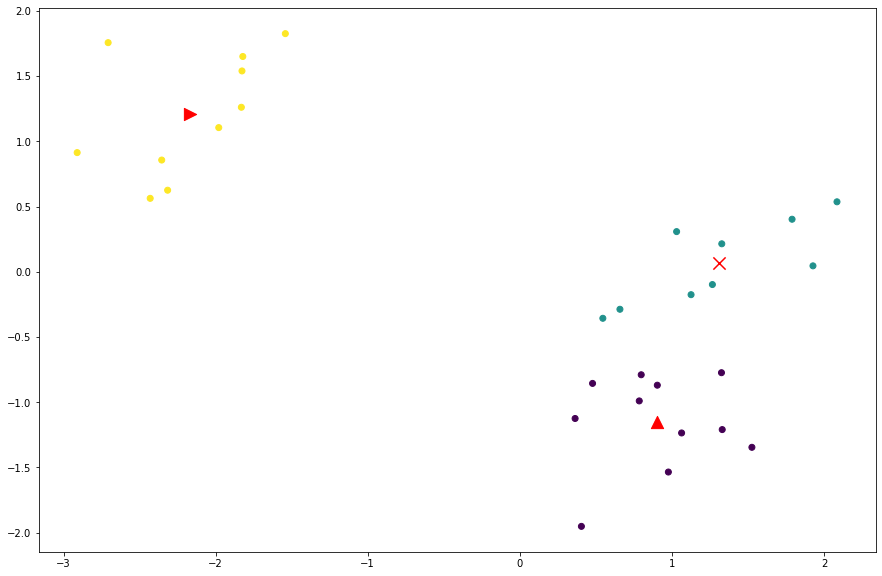

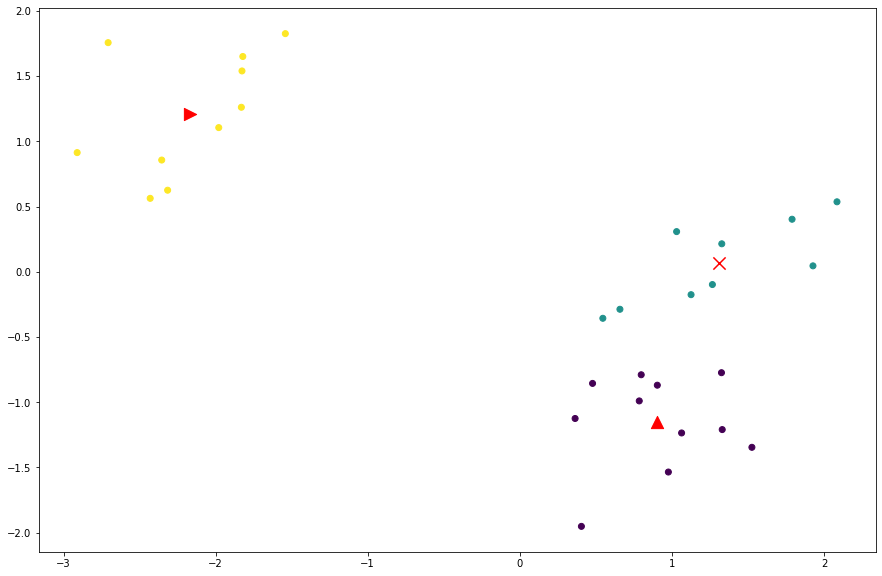

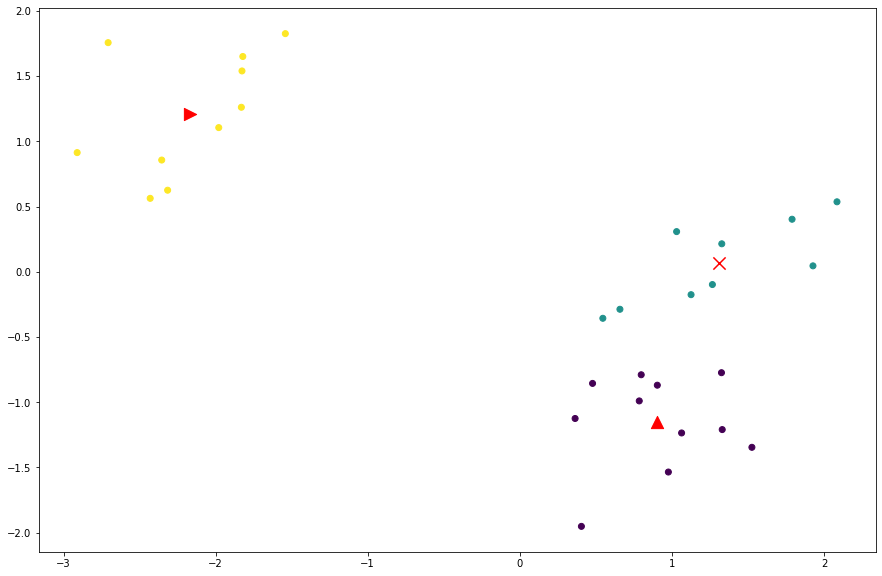

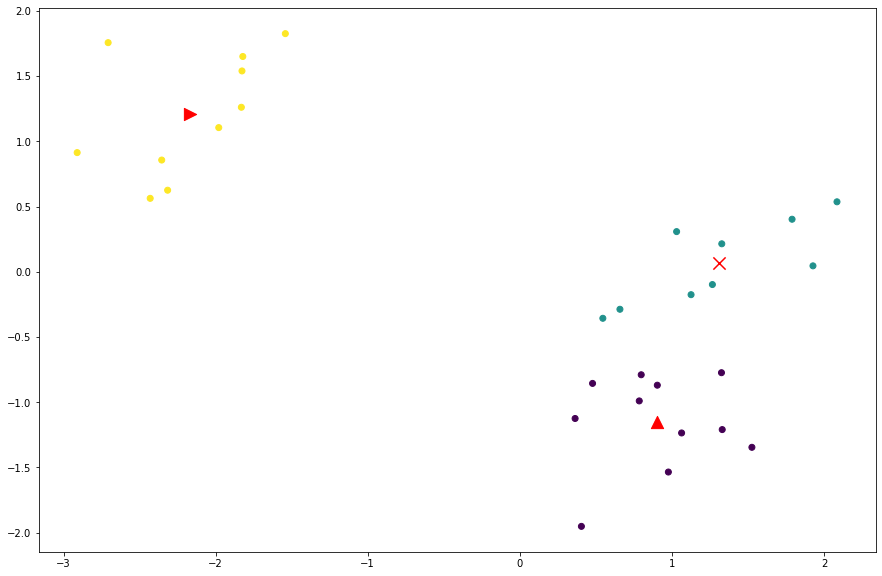

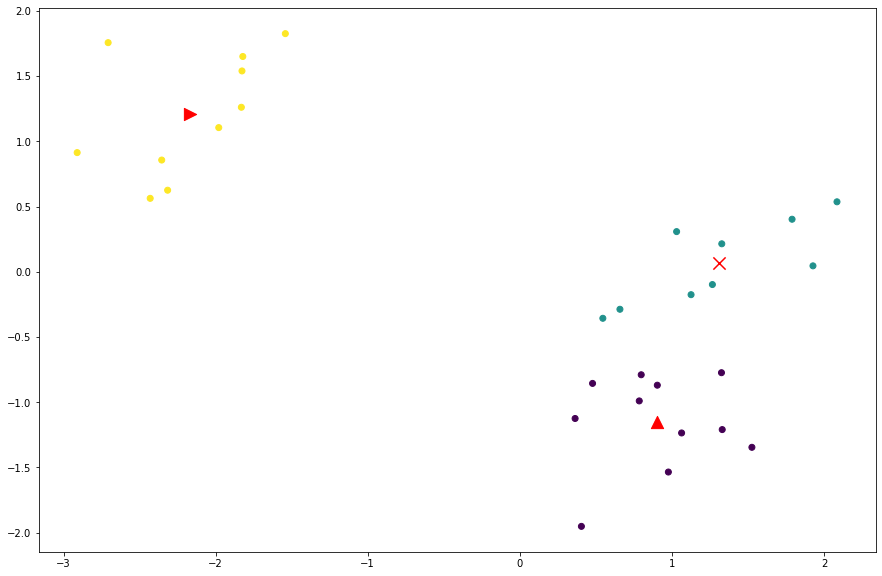

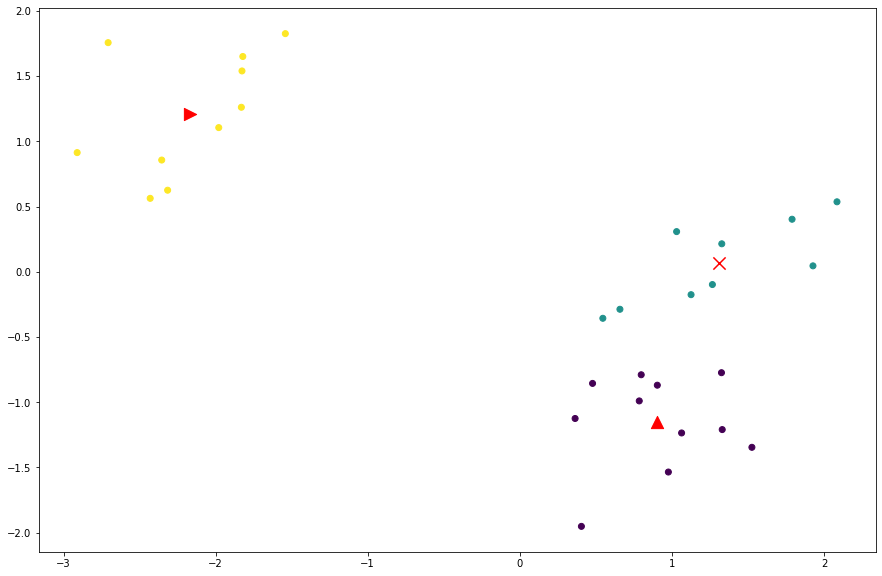

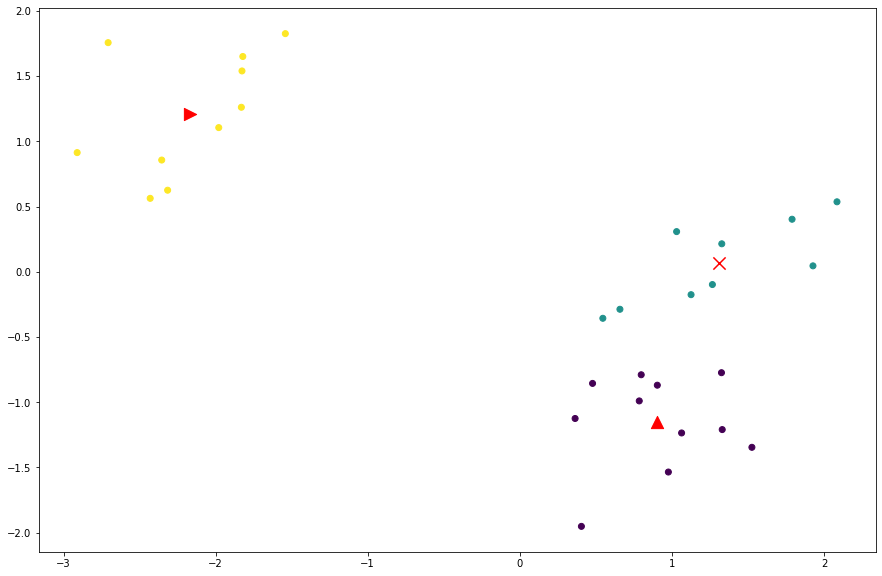

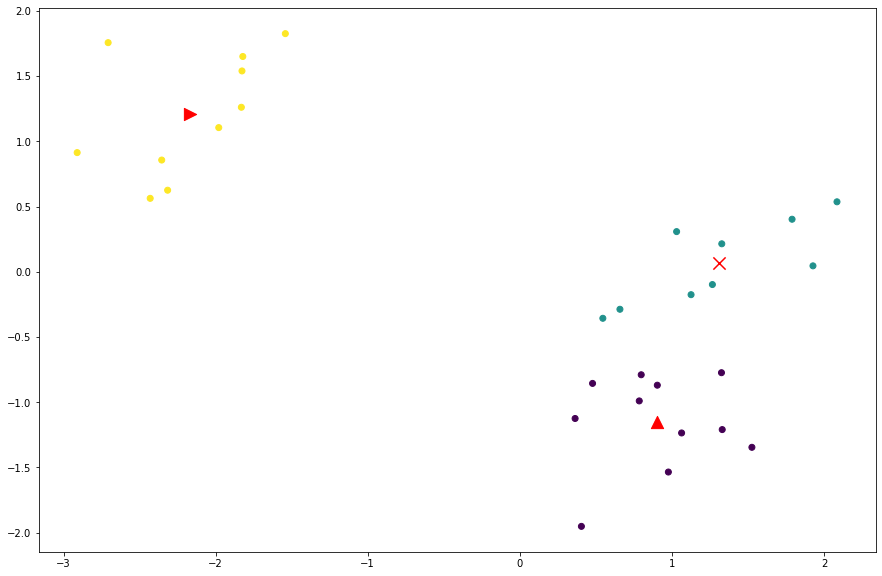

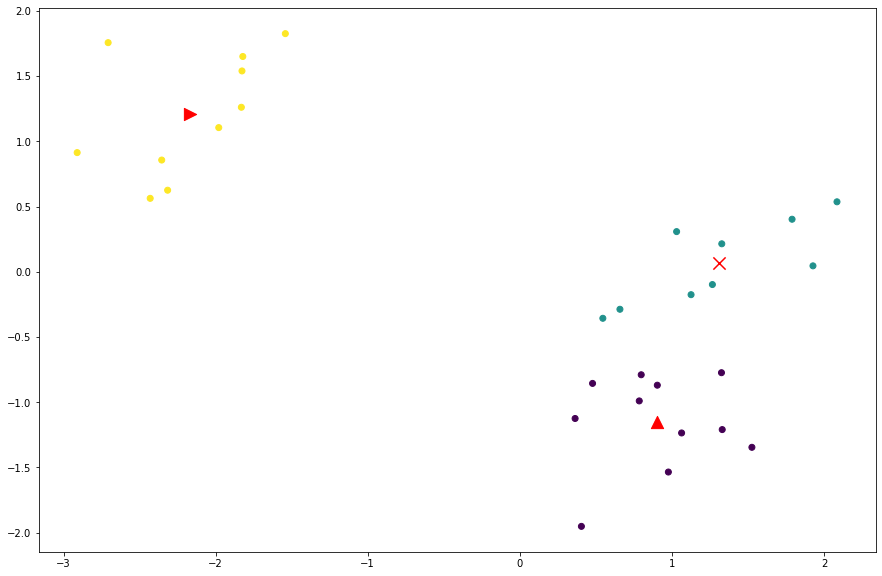

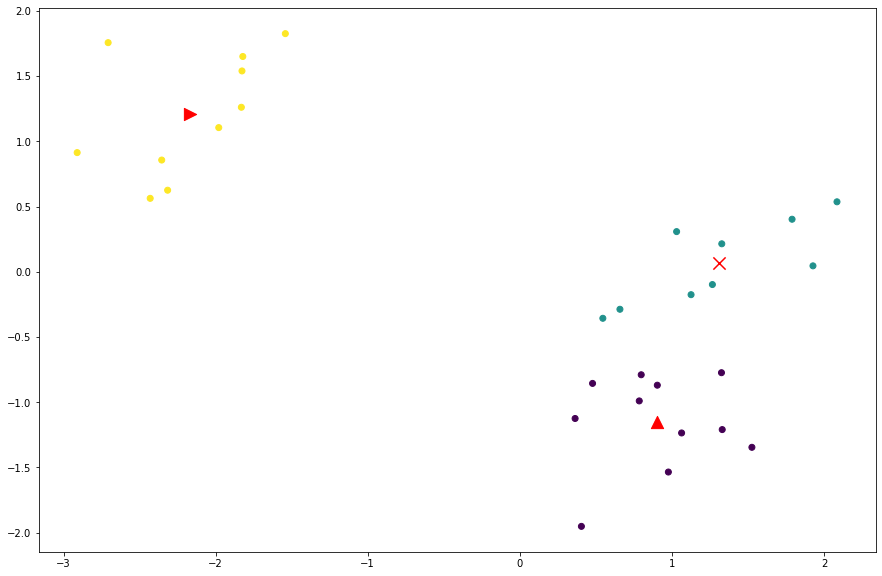

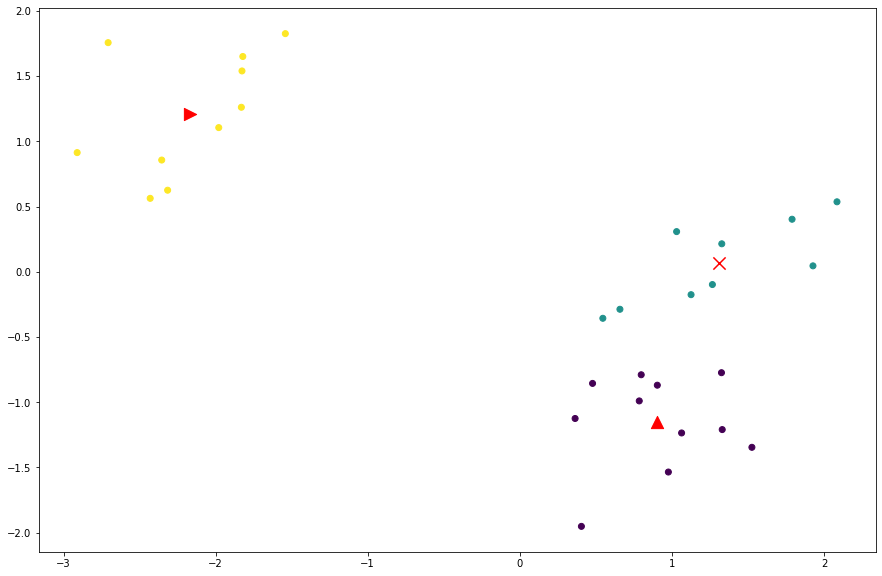

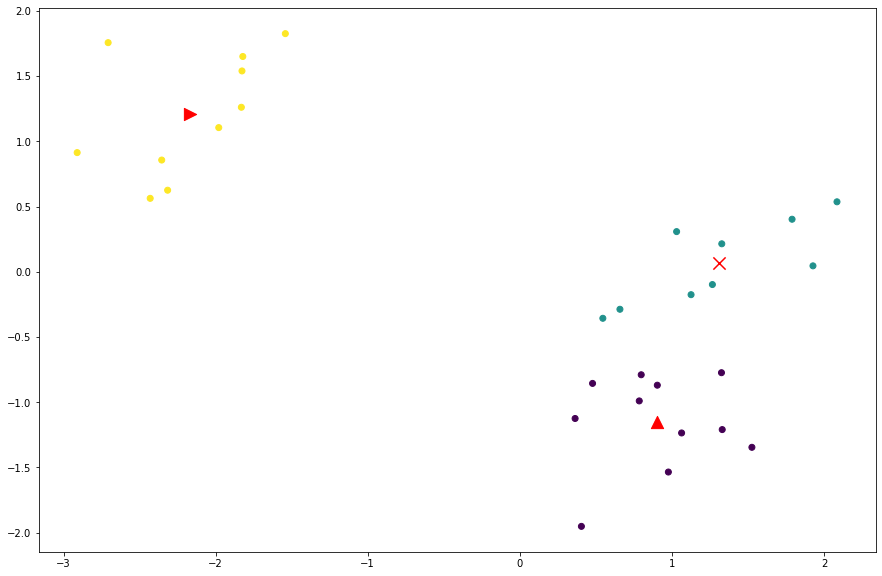

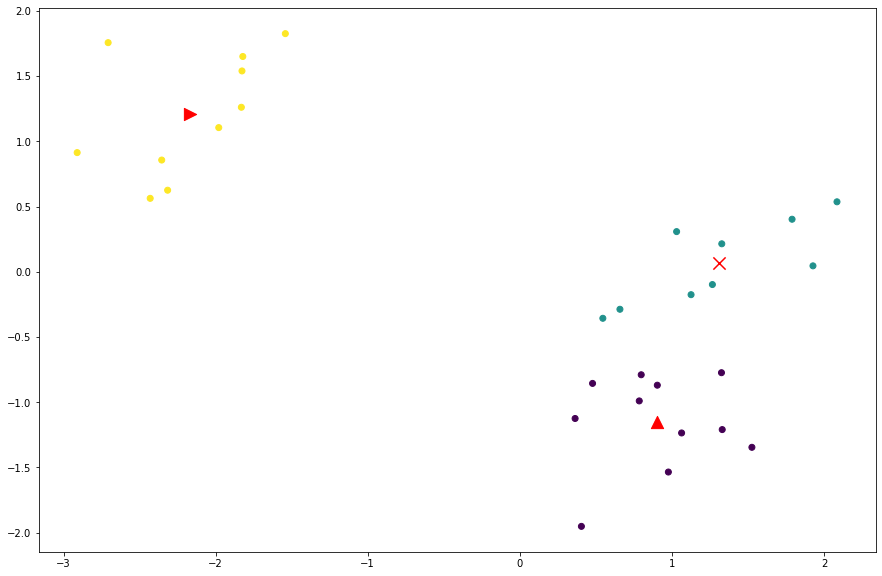

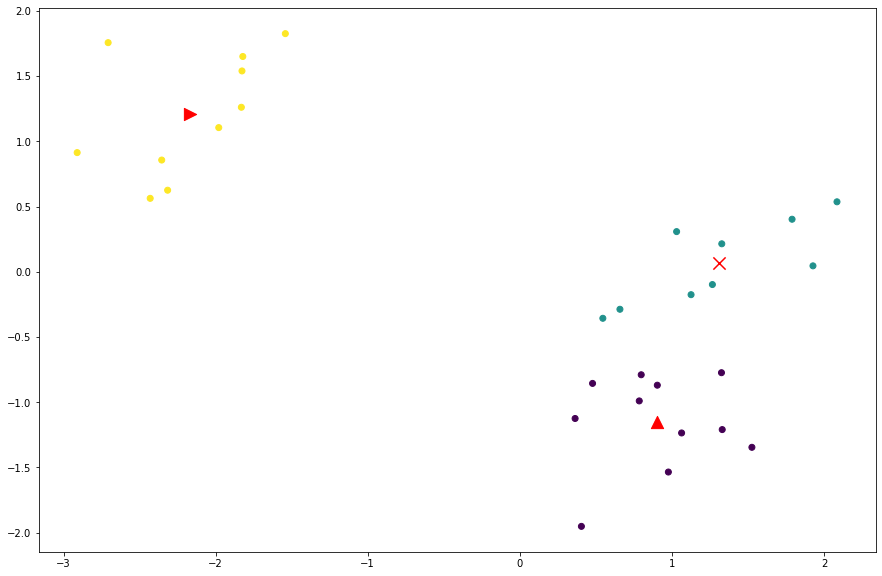

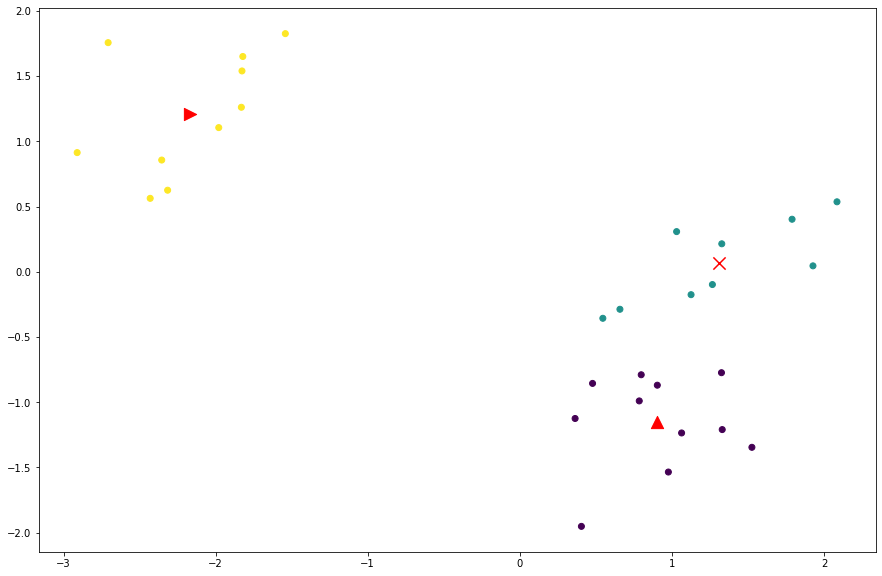

In [52]:
while iteracje < 30:
    p1=[]
    p2=[]
    p3=[]
    for i in range(0,30):
        point1=np.array((dane['PC1'][i],dane['PC2'][i]))
        point2=centroids[0]
        distance=np.linalg.norm(point1 - point2)
        p1.append(distance)
    for i in range(0,30):
        point1=np.array((dane['PC1'][i],dane['PC2'][i]))
        point2=centroids[1]
        distance=np.linalg.norm(point1 - point2)
        p2.append(distance)
    for i in range(0,30):
        point1=np.array((dane['PC1'][i],dane['PC2'][i]))
        point2=centroids[2]
        distance=np.linalg.norm(point1 - point2)
        p3.append(distance)
    p1 = np.array(p1)
    p2 = np.array(p2)
    p3 = np.array(p3)

    p1 = p1.reshape(30,1)
    p2 = p2.reshape(30,1)
    p3 = p3.reshape(30,1)
    joined = np.concatenate((p1,p2,p3), axis = 1)
    klas=np.argmin(joined,axis=1)
    nowy_centroid=np.array([dane[klas==i].mean(axis=0)for i in range(k)])
    centroids=nowy_centroid
    iteracje+=1
    c1=nowy_centroid[0]
    c2=nowy_centroid[1]
    c3=nowy_centroid[2]
    plt.scatter(dane['PC1'],dane['PC2'],c=klas)
    plt.scatter(c1[0],c1[1],color='red',marker="^", s=150)
    plt.scatter(c2[0],c2[1],color='red',marker="x", s=150)
    plt.scatter(c3[0],c3[1],color='red',marker=">", s=150)
    plt.rcParams['figure.figsize'] = [15, 10]
    plt.show()

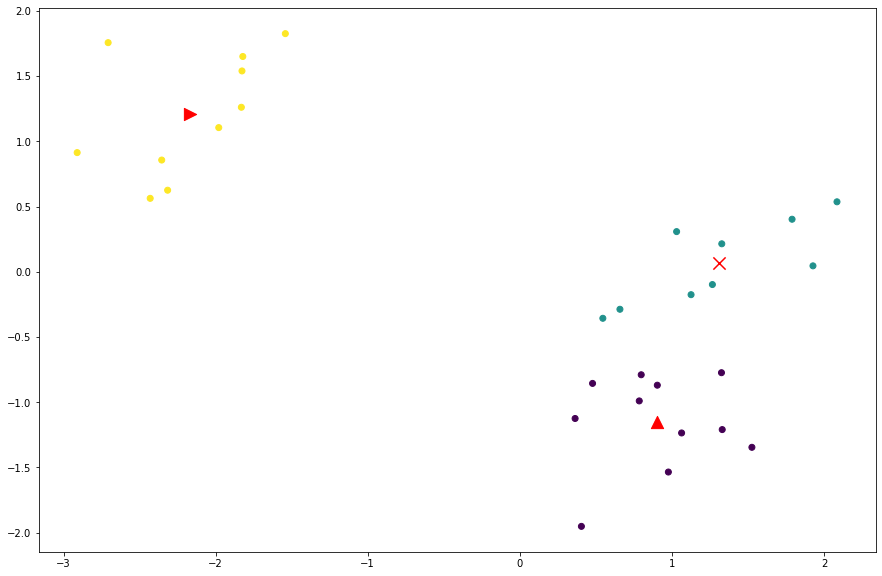

In [53]:
plt.scatter(dane['PC1'],dane['PC2'],c=klas)
plt.scatter(c1[0],c1[1],color='red',marker="^", s=150)
plt.scatter(c2[0],c2[1],color='red',marker="x", s=150)
plt.scatter(c3[0],c3[1],color='red',marker=">", s=150)
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()